# Procesamiento de imagen con OpenCV

En esta actividad utilizaremos OpenCV para aplicar transformaciones básicas a la imagen **DPP0357.TIFF** en escala de grises.

In [1]:
# 🔧 Preparación
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Función auxiliar para mostrar imágenes
def mostrar_img(img, titulo="Imagen"):
    if img is None:
        print(f"⚠️ No se puede mostrar '{titulo}': la imagen es None")
        return
    #plt.figure(figsize=(5,5))
    plt.imshow(img, cmap='gray')
    plt.title(titulo)
    plt.axis('off')
    plt.show()

## Carga de la imagen



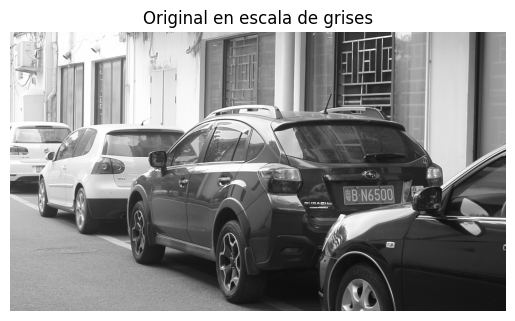

In [2]:
# Cargar imagen en escala de grises
imagen = cv2.imread('DPP0357.TIF', cv2.IMREAD_GRAYSCALE)
mostrar_img(imagen, "Original en escala de grises")



In [3]:
# Opción para entorno local usando imshow
#cv2.imshow("Original en escala de grises", imagen)
#cv2.waitKey(0)

## a. Cambio de tamaño (resize)

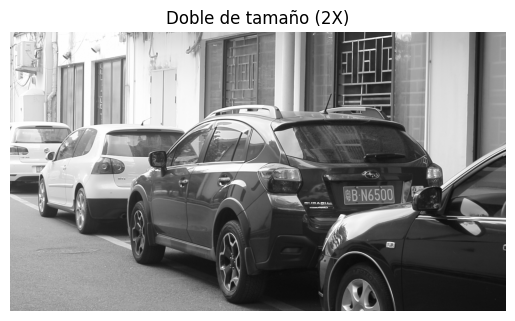

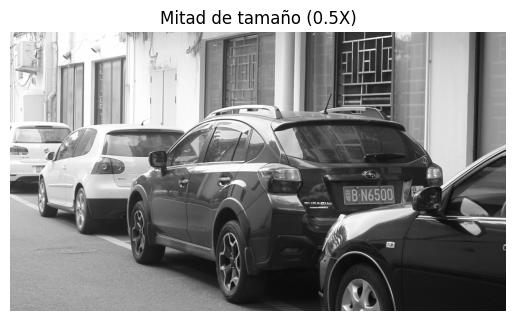

In [4]:
# Doble de tamaño (2X)
imagen_doble = cv2.resize(imagen, None, fx=2.0, fy=2.0, interpolation=cv2.INTER_LINEAR)
mostrar_img(imagen_doble, "Doble de tamaño (2X)")

# Mitad de tamaño (0.5X)
imagen_mitad = cv2.resize(imagen, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
mostrar_img(imagen_mitad, "Mitad de tamaño (0.5X)")

## b. Recorte (crop) a 512x512

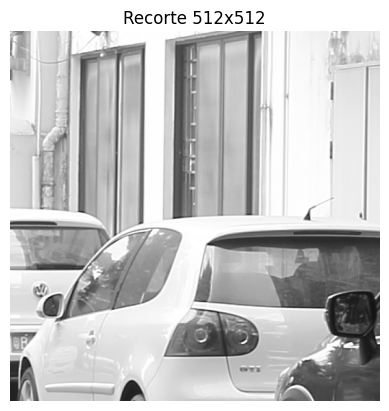

In [5]:
# Definir punto de inicio para recorte (puede modificarse)
inicio_y, inicio_x = 100, 100
crop = imagen[inicio_y:inicio_y+512, inicio_x:inicio_x+512]
mostrar_img(crop, "Recorte 512x512")

## c. Rotaciones (1, 5 y 10 grados)

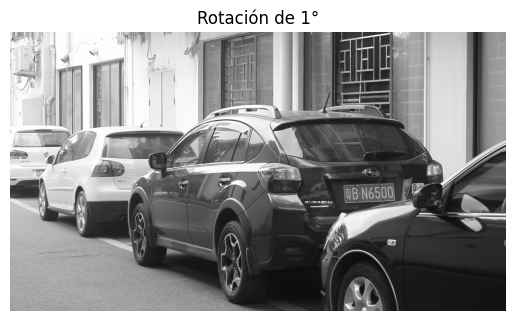

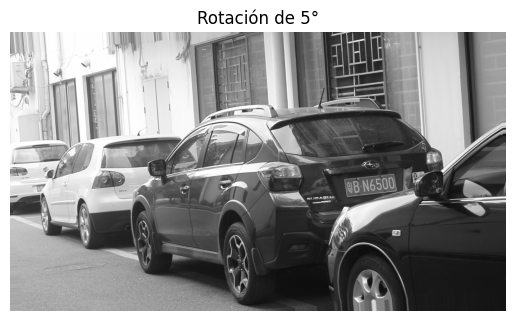

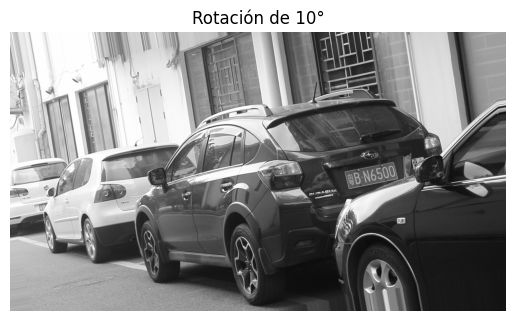

In [6]:
def rotar_imagen(img, angulo):
    (h, w) = img.shape
    centro = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(centro, angulo, 1.0)
    rotada = cv2.warpAffine(img, M, (w, h), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REPLICATE)
    return rotada

# Rotaciones solicitadas
for angulo in [1, 5, 10]:
    rotada = rotar_imagen(imagen, angulo)
    mostrar_img(rotada, f"Rotación de {angulo}°")